# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## 1. 데이터 가져오기

- sklearn의 데이터셋 중 당뇨병 데이터 사용

In [38]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

## 2. 모델에 입력할 데이터 X 준비하기

- df_X의 값들을 numpy array로 변환하고 저장

In [39]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


## 3. 모델에 예측할 데이터 Y 준비하기

- df_Y의 값들을 numpy array로 변환하고 저장

In [40]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


## 4. train / test 데이터 분리하기

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 5. 모델 준비하기

- 선형 회귀 모델을 위한 가중치 W, 절편 b 초기화

In [42]:
W = np.random.rand(X_train.shape[1]) # X_train.shape[1]는 피처의 개수를 의미한다
b = np.random.rand()

print(len(W))

10


In [44]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## 6. 손실함수 loss 정의하기

- MSE 함수 사용

In [45]:
# 손실함수 loss 정의하기

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [46]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## 7. 기울기를 구하는 gradient 함수 구현하기

In [47]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

## 8. 하이퍼 파라미터인 학습률 설정하기

- 처음에 0.001로 했다가 0.01로 바꾸니 loss가 더 하락했다!
- 에포크는 그대로 학습률만 조정했습니다.

In [48]:
LEARNING_RATE = 0.01

## 9. 모델 학습하기

- loss 값이 너무 크게 나와서 모든 피처의 스케일을 통일했다.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3335.5734
Iteration 200 : Loss 2906.4341
Iteration 300 : Loss 2897.1087
Iteration 400 : Loss 2895.8543
Iteration 500 : Loss 2894.8495
Iteration 600 : Loss 2893.8926
Iteration 700 : Loss 2892.9719
Iteration 800 : Loss 2892.0852
Iteration 900 : Loss 2891.2309
Iteration 1000 : Loss 2890.4078
119 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 10. test 데이터에 대한 성능 확인하기

In [51]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2885.892593252937)

## 11. 정답 데이터와 예측한 데이터 시각화하기

- x 축에는 X 데이터의 첫 번째 컬럼
- y 축에는 정답인 target 데이터
- 모델이 예측한 결과 최종 시각화

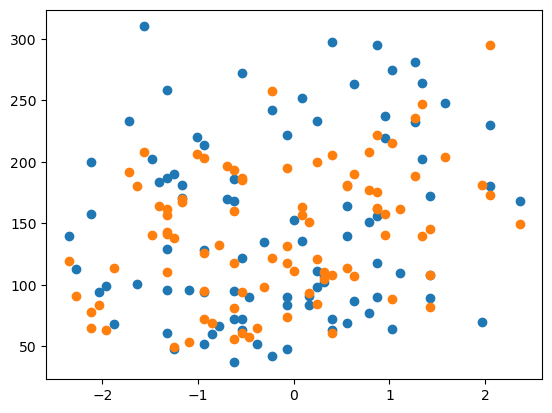

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## Review

- learning rate와 iteration의 값을 위주로 변경했더니 loss와 mse가 5000 정도에서만 웃돌았다. (최저는 3300 정도?)
- 노드에 있는 자료를 꼼꼼히 읽으면서 찾았던 인사이트(정규화를 해주면 loss 값이 줄어들 것이다..)를 방향성으로 잡았다.
- StandardScaler를 통해 train / test 데이터의 평균을 0으로, 분산은 1로 조정했다.
- loss와 mse가 2909 정도 도달했으나, 학습률을 변경하면 더 내려갈 수 있다는 이야기를 듣고 학습률을 0.01로 조정했다.
- 최종적으로 2885까지 도달할 수 있었고 시각화를 해보니 이전보다 훨씬 예측을 잘 하게 된 거 같다. (이전에는 예측 값이 거의 일직선이었다.)

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 1. 데이터 가져오기

In [53]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6개의 컬럼으로 생성하기

- to_datetime 활용해서 변환

In [54]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

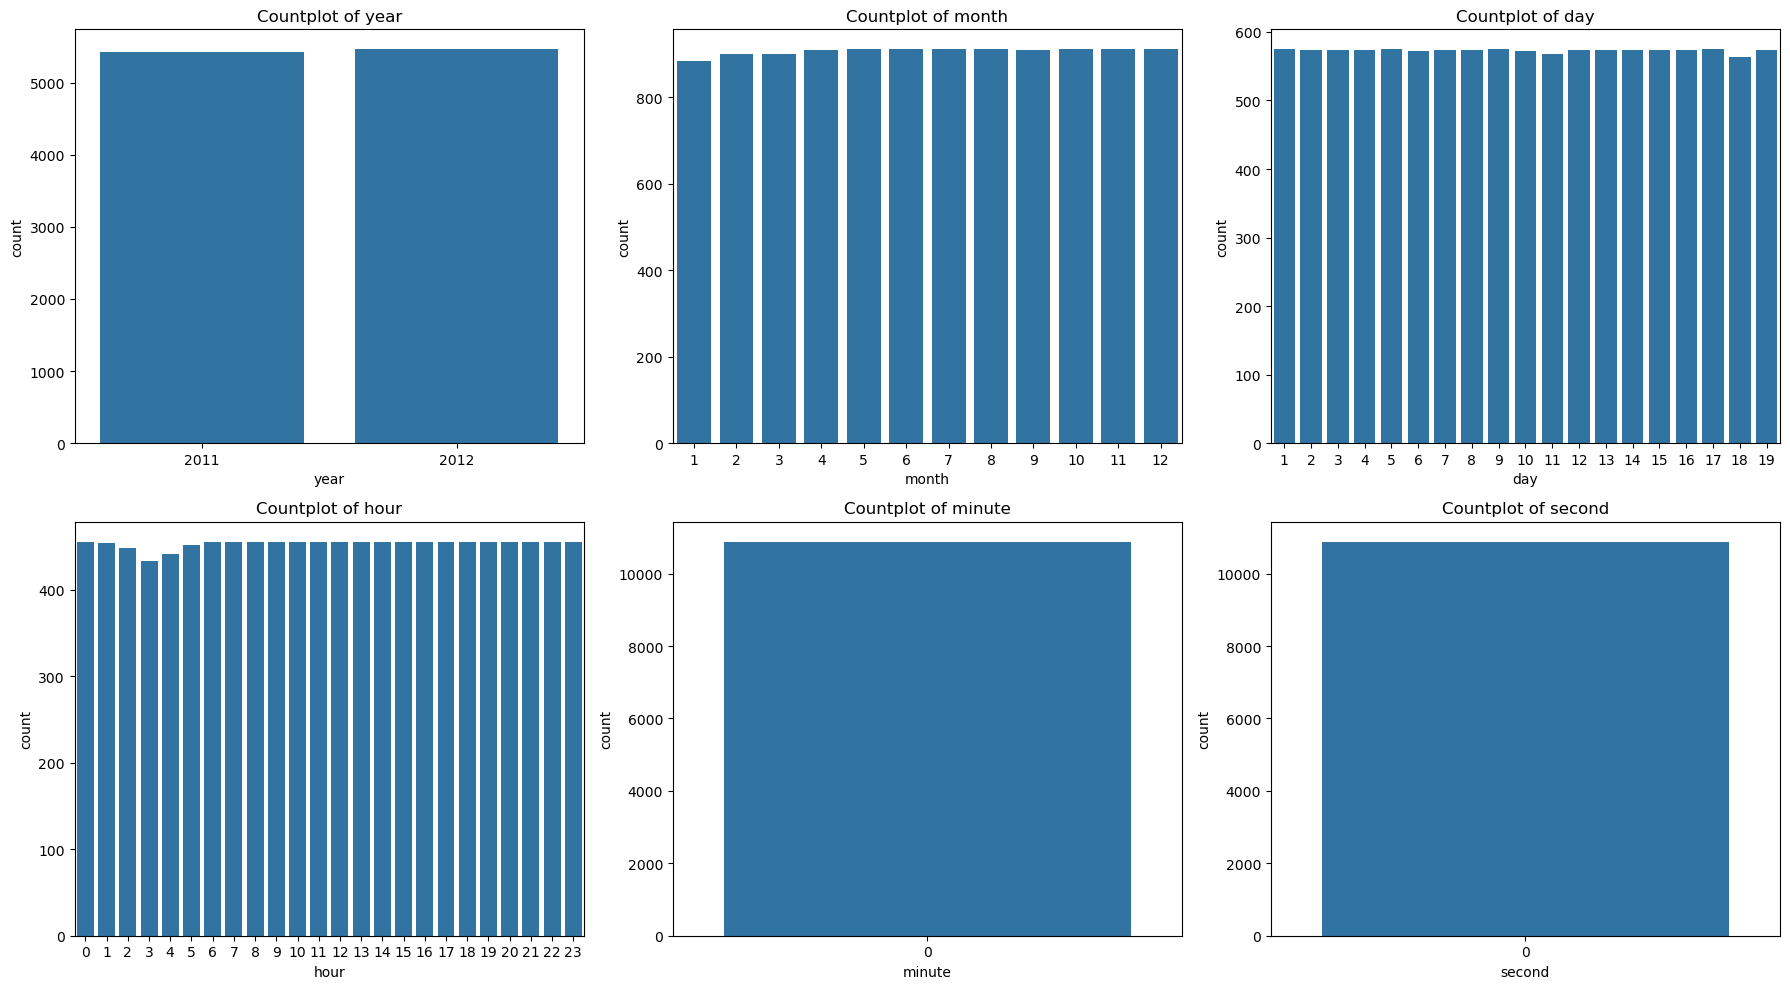

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

## (번외) 어떤 피처가 count에 영향을 주는지 확인하고자 히트맵 시각화 진행

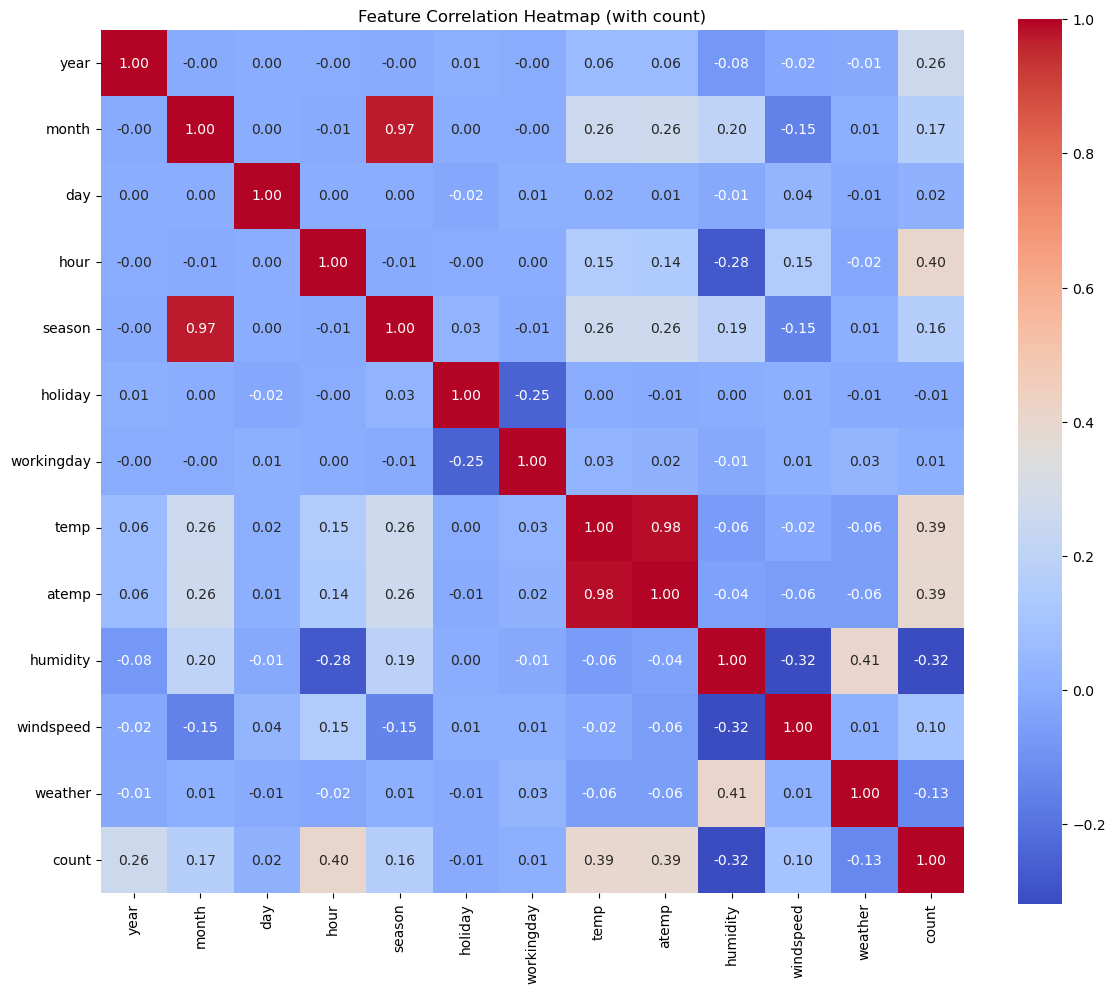

In [70]:
# 히트맵으로 한 눈에 보기

features = [
    'year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday',
    'temp', 'atemp', 'humidity', 'windspeed', 'weather', 'count'
]

# 상관행렬 계산
corr = train[features].corr()

# 전체 상관계수 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap (with count)")
plt.tight_layout()
plt.show()

## 4. X, y 컬럼 선택 및 train / test 데이터 분리

In [74]:
# 이거는 원래 베이스라인

features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## (번외) 파생 변수를 만들어 보았습니다..

- 출퇴근 시간대에는 자전거를 많이 탈 것 같아서 rush_hour 생성
- 출퇴근 시간대면 1, 아니면 0으로 적용해서 rush_hour에 저장하기

In [80]:
train['rush_hour'] = train['hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

# 최종 사용한 피처
features = [
    'year',         # 연도
    'month',        # 월
    'day',          # 일
    'hour',         # 시간
    'season',       # 계절
    'holiday',      # 공휴일 여부
    'workingday',   # 평일 여부
    'temp',         # 실제 기온
    'atemp',        # 체감 온도
    'humidity',     # 습도
    'windspeed',    # 풍속
    'weather',      # 날씨
    'rush_hour'     # 출퇴근 시간대 여부
]

X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. LinearRegression 모델 학습

In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실 함수 값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산
- MSE, RMSE 계산

In [78]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 14575.5846384377
RMSE: 120.7293859772247


## 7. x 축은 temp 또는 humidity로, y 축은 count로 예측 결과 시각화하기

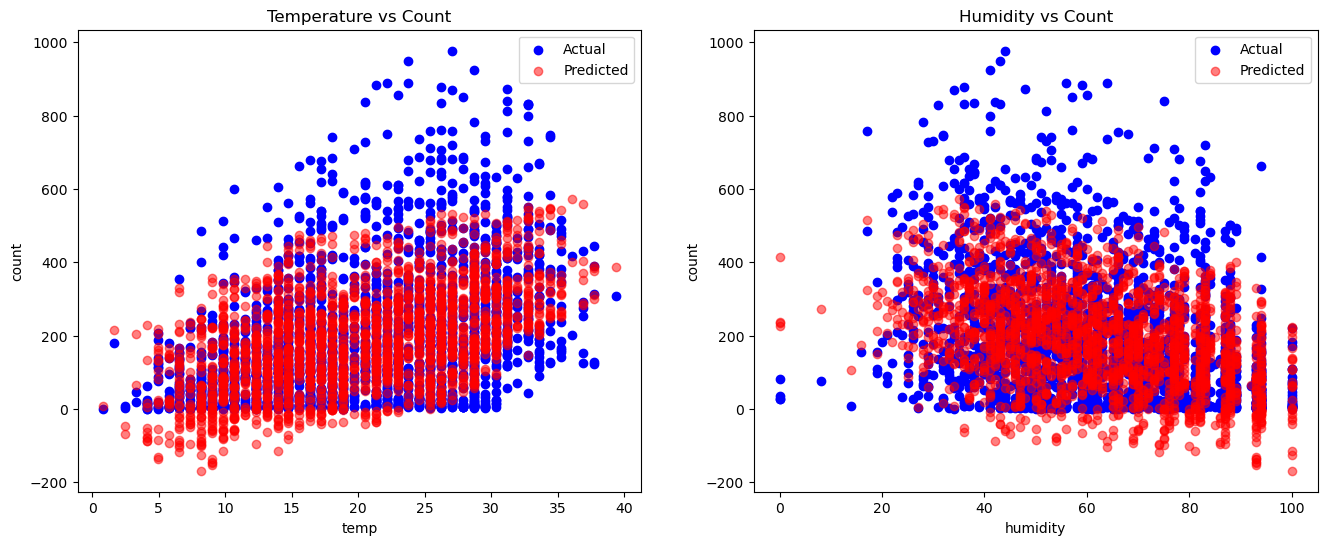

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

## Review

- datetime을 year, month 등으로 쪼개는 것에 대해서 어렵게 느껴졌는데 이번 기회에 확실히 개념을 잡고 갈 수 있었다.
- 기존 베이스라인 코드에서 어떻게 더 업그레이드를 할 수 있을까 고민을 한 끝에 파생 변수를 만들기로 했다.
- 보통 출퇴근 길에 자전거를 많이 타니까 hour가 7, 8, 9시(출근) + 17, 18, 19시(퇴근)인 경우에 rush_hour에 포함시켰다.
- 피처에 포함시키고 학습을 진행하니 rmse가 141에서 120으로 대폭 줄었다.
- 다른 파생 변수도 만들 수 있는데 너무 복잡해질 것 같아 일단 rush_hour만 이용했지만, season이나 실제 습도 - 체감 습도 등을 추가해도 괜찮을 것 같다.